In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so


In [3]:
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<p style="color: #99a3a4">📝
Pour les 21613 entrées, il n'y a aucune valeur nulle.</p>

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df_average = df.set_index('id')
df_average = df_average.mean(numeric_only=True)
df_average

price            540088.141767
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
zipcode           98077.939805
lat                  47.560053
long               -122.213896
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

<p style="color: #99a3a4">📝
on note une coherence globale. Mais regardons 'waterfront', 'view', 'condition', et 'grade' qui ont des valeurs par index :</p>

In [6]:
df1 = df.groupby(['waterfront']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['waterfront']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfwaterfront = pd.concat([df1, df2], axis=1)
dfwaterfront

,total,average_price
waterfront,,
0,21450,531564.0
1,163,1661876.0


<p style="color: #99a3a4">📝
La colonne waterfront est sensiblement un booléen 0 ou 1, seul 0,75% des entrées ont une vue sur la mer. Mais il y a une grosse incidence sur le prix.</p>

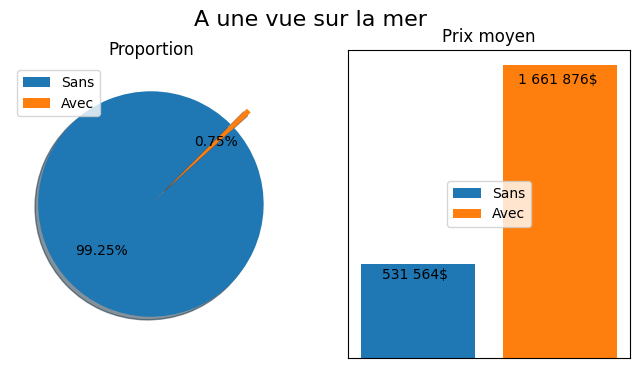

In [7]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.suptitle('A une vue sur la mer', fontsize=16)
ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
ax1.legend(['Sans', 'Avec'])
ax1.set_title('Proportion')
ax2.bar(dfwaterfront.index[0], dfwaterfront.average_price[0], label='Sans')
ax2.bar(dfwaterfront.index[1], dfwaterfront.average_price[1], label='Avec')
ax2.legend(loc = 10)
ax2.text(-0.25, 450000,'531 564$')
ax2.text(0.70, 1550000, '1 661 876$')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title('Prix moyen')
plt.show()

<center><p style="color: #99a3a4">📝
Un bien qui possede une vue sur la mer voit son prix tripler en moyenne.</p></center>

In [8]:
df1 = df.groupby(['view']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['view']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfview = pd.concat([df1, df2], axis=1)
dfview

,total,average_price
view,,
0,19489,496564.0
1,332,812281.0
2,963,792401.0
3,510,971965.0
4,319,1463711.0


<p style="color: #99a3a4">📝
90,17% des biens ont un score de vue à 0 mais on note une incidence sur le prix.</p>

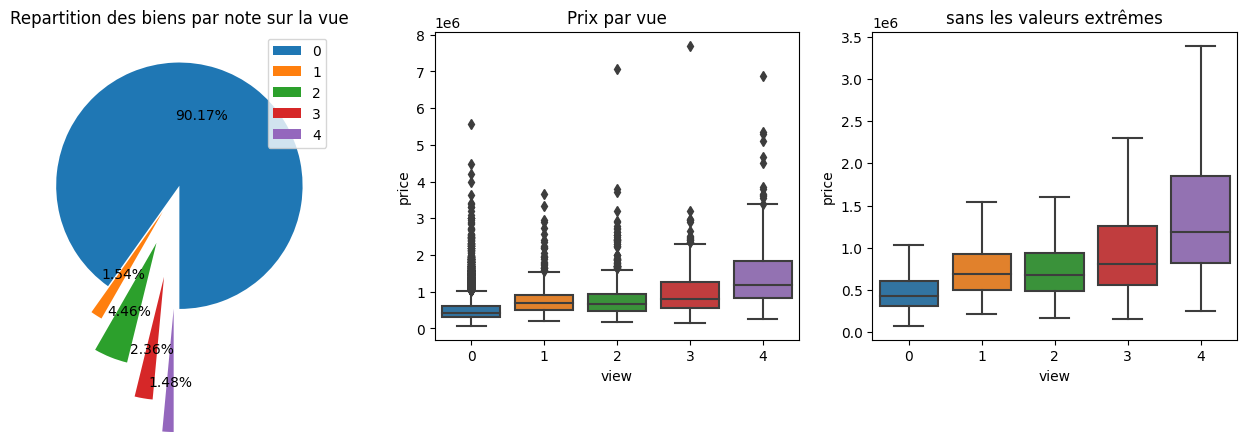

In [9]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.pie(data=dfview, x=dfview.total, autopct="%1.2f%%", explode=[0,0.25,0.5,0.75,1], startangle=-90)
plt.title('Repartition des biens par note sur la vue')
plt.legend(['0','1','2','3','4'],loc=1)
# ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
plt.subplot(1, 3, 2)
sns.boxplot(data = df,x = "view" ,y= "price")
plt.title("Prix par vue")

plt.subplot(1, 3, 3)
sns.boxplot(data = df,x = "view" ,y= "price", showfliers = False)
plt.title("sans les valeurs extrêmes")
plt.show()

<center><p style="color: #99a3a4">📝
Les prix ont tendance à être plus elevés si la vue est bien notée.</p></center>

In [10]:
df1 = df.groupby(['condition']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['condition']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfcondition= pd.concat([df1, df2], axis=1)
dfcondition

,total,average_price
condition,,
1,30,334432.0
2,172,327287.0
3,14031,542013.0
4,5679,521200.0
5,1701,612418.0


<p style="color: #99a3a4">📝
Bien que seul 0,93% des biens ont une note en dessous de 3, on note une repercussion sur le prix à la baisse.</p>

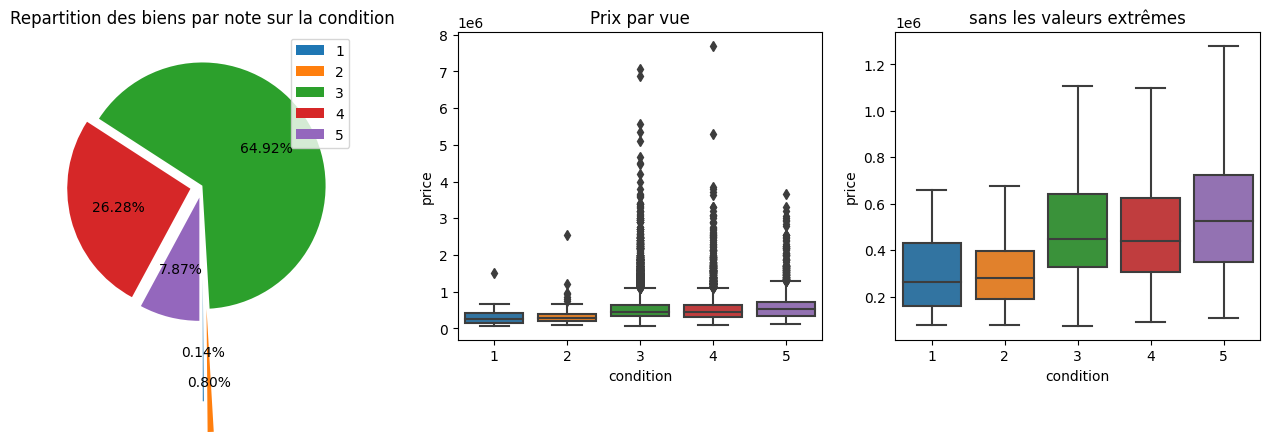

In [11]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.pie(data=dfcondition, x=dfcondition.total, autopct="%1.2f%%", explode=[0.75,1,0,0.1,0.1], startangle=-90)
plt.title('Repartition des biens par note sur la condition')
plt.legend(['1','2','3','4','5'],loc=1)
# ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
plt.subplot(1, 3, 2)
sns.boxplot(data = df,x = "condition" ,y= "price")
plt.title("Prix par vue")

plt.subplot(1, 3, 3)
sns.boxplot(data = df,x = "condition" ,y= "price", showfliers = False)
plt.title("sans les valeurs extrêmes")
plt.show()

<center><p style="color: #99a3a4">📝
Les notes 1 et 2 baissent beaucoup le prix, 3, 4 sont sensiblement sur les même moyennes. 5 augemente un peu le prix</p></center>

In [12]:
df1 = df.groupby(['grade']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['grade']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfgrade= pd.concat([df1, df2], axis=1)
dfgrade

,total,average_price
grade,,
1,1,142000.0
3,3,205667.0
4,29,214381.0
5,242,248524.0
6,2038,301920.0
7,8981,402590.0
8,6068,542853.0
9,2615,773513.0
10,1134,1071771.0


<p style="color: #99a3a4">📝
La correlation entre la notation et le prix semble linéaire</p>

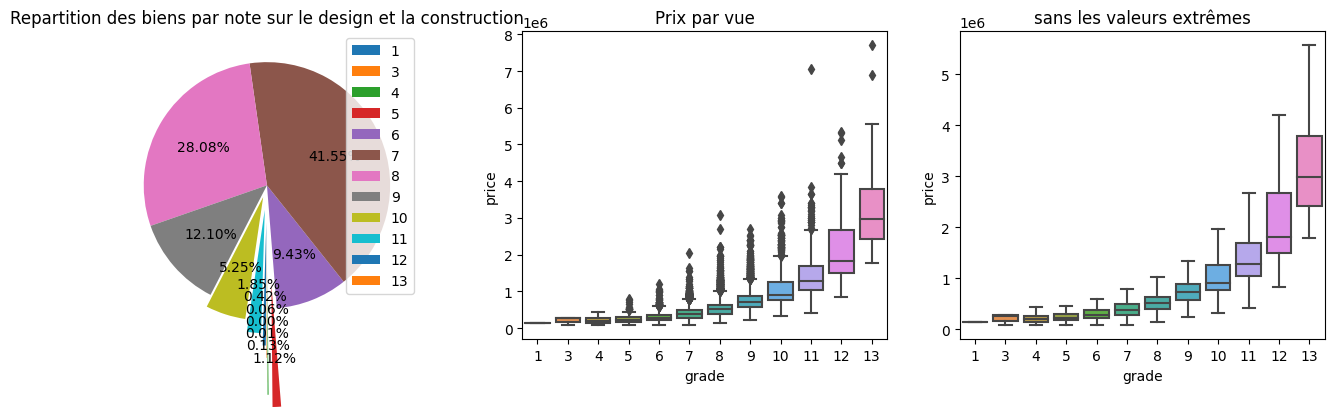

In [13]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.pie(data=dfgrade, x=dfgrade.total, autopct="%1.2f%%", explode=[0.5,0.6,0.7,0.8,0,0,0,0,0.1,0.2,0.3,0.4],startangle=-90)
plt.title('Repartition des biens par note sur le design et la construction')
plt.legend(['1','3','4','5','6', '7', '8', '9','10','11','12','13'],loc=1)
# ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
plt.subplot(1, 3, 2)
sns.boxplot(data = df,x = "grade" ,y= "price")
plt.title("Prix par vue")

plt.subplot(1, 3, 3)
sns.boxplot(data = df,x = "grade" ,y= "price", showfliers = False)
plt.title("sans les valeurs extrêmes")
plt.show()

<p style="text-align:center"; style="color: #99a3a4">📝
La correlation entre la notation est le prix est plutôt exponentielle</p>

In [34]:
import folium
from branca.element import Figure
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.390698], zoom_start=9)
data = pd.read_csv('kc_house_data.csv')
data = data.sample(400)[['lat','long']]
for i, j in data.iterrows():
    folium.Marker(
        location=[j['lat'], j['long']]
    ).add_to(m)
fig.add_child(m)

<p style="color: #99a3a4">📝
La position d'un échantillon de 400 biens. </p>